## CNN

In [1]:
import os
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input,Dense,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.preprocessing.image import ImageDataGenerator

/home/abhinandan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
visible = Input(shape=(64,64,3))
#Block-1
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
#Block-2
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

flat = Flatten()(pool2)
hidden1 = Dense(10, activation='relu')(flat)
output = Dense(1, activation='sigmoid')(hidden1)
model1 = Model(inputs=visible, outputs=output)
# Compiling the CNN
model1.compile(optimizer = 'adam', 
               loss = 'binary_crossentropy', 
               metrics = ['accuracy'])
# summarize layers
print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 16)        8208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                27050     
__________

In [18]:
plot_model(model1, to_file='CNN_Model_1.png')

In [19]:
# input layer
visible = Input(shape=(64,64,3))

# first feature extractor
conv1 = Conv2D(32, kernel_size=2, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flat1 = Flatten()(pool1)

# second feature extractor
conv2 = Conv2D(16, kernel_size=8, activation='relu')(visible)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat2 = Flatten()(pool2)

# merge feature extractors
merge = concatenate([flat1, flat2])

# interpretation layer
hidden1 = Dense(10, activation='relu')(merge)
# prediction output
output = Dense(1, activation='sigmoid')(hidden1)

model2 = Model(inputs=visible, outputs=output)

# Compiling the CNN
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# summarize layers
print(model2.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 63, 63, 32)   416         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 57, 57, 16)   3088        input_5[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_9 (MaxPooling2D)  (None, 31, 31, 32)   0           conv2d_9[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [20]:
plot_model(model2, to_file='CNN_Model2.png')

In [21]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [22]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [23]:
model1.fit_generator(training_set,
                     steps_per_epoch =100,
                     epochs = 25,
                     validation_data = test_set,
                     validation_steps = 10)

Epoch 1/25
 87/100 [=========================>....] - ETA: 7s - loss: 0.6961 - acc: 0.5208

KeyboardInterrupt: 

In [24]:
model2.fit_generator(training_set,
                     steps_per_epoch =100,
                     epochs = 25,
                     validation_data = test_set,
                     validation_steps = 10)

Epoch 1/25
 64/100 [==================>...........] - ETA: 16s - loss: 0.6926 - acc: 0.5542

KeyboardInterrupt: 

## OpenCV

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

## NumPy and Image Basics

In [2]:
pic = Image.open('DATA/00-puppy.jpg')

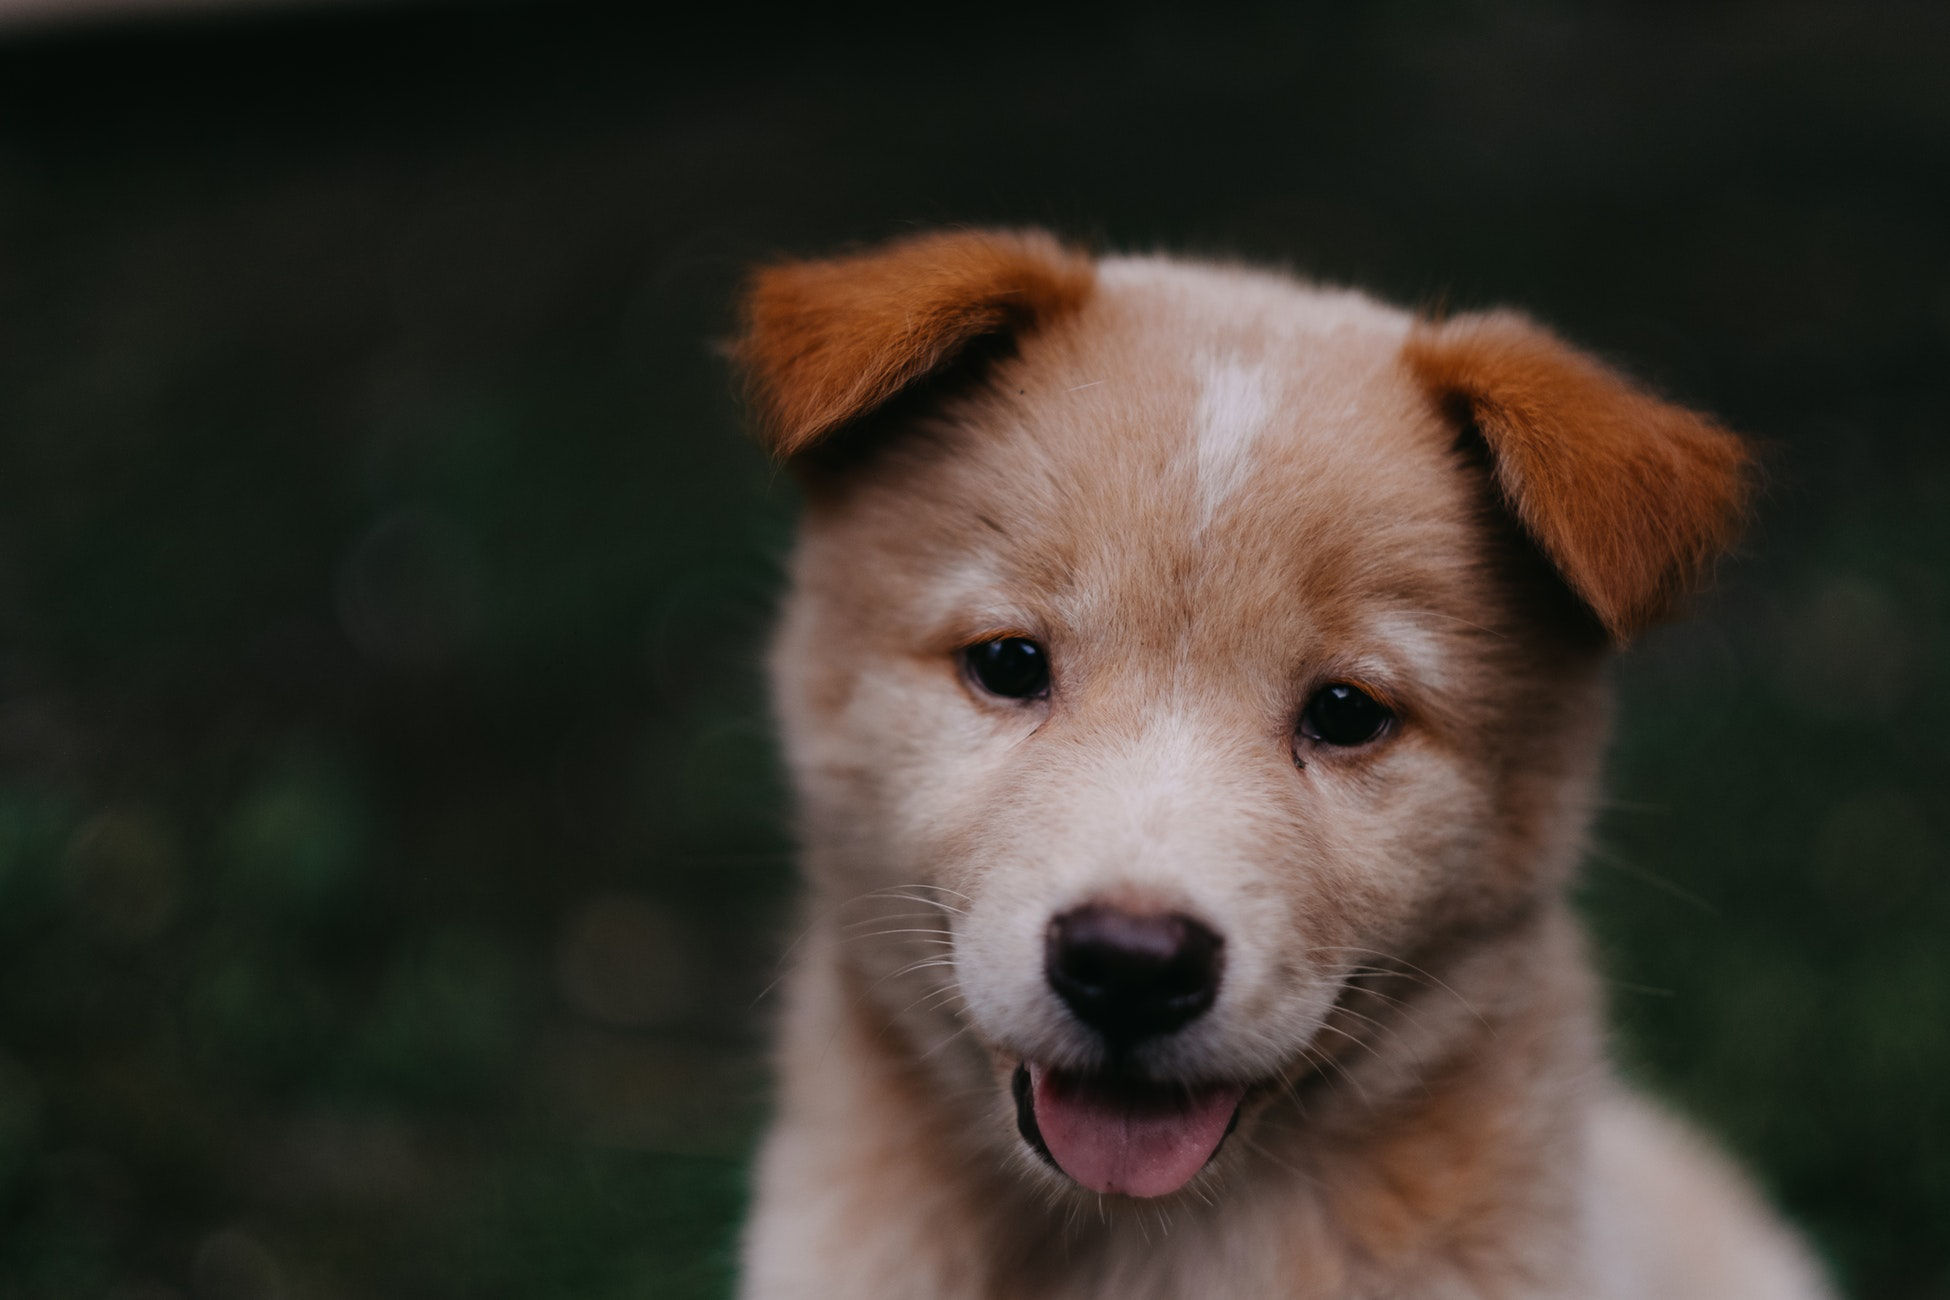

In [3]:
pic

In [4]:
type(pic)

PIL.JpegImagePlugin.JpegImageFile

In [5]:
pic_arr = np.asarray(pic)
pic_arr.shape

(1300, 1950, 3)

In [6]:
pic_arr

array([[[95, 81, 78],
        [97, 83, 80],
        [98, 84, 81],
        ...,
        [25, 27, 22],
        [25, 27, 22],
        [25, 27, 22]],

       [[95, 81, 78],
        [96, 82, 79],
        [96, 82, 79],
        ...,
        [25, 27, 22],
        [25, 27, 22],
        [25, 27, 22]],

       [[95, 81, 78],
        [94, 80, 77],
        [94, 80, 77],
        ...,
        [25, 27, 22],
        [25, 27, 22],
        [25, 27, 22]],

       ...,

       [[19, 29, 20],
        [20, 30, 21],
        [20, 30, 21],
        ...,
        [23, 30, 22],
        [24, 31, 23],
        [24, 31, 23]],

       [[20, 30, 21],
        [20, 30, 21],
        [19, 29, 20],
        ...,
        [23, 30, 22],
        [24, 31, 23],
        [24, 31, 23]],

       [[20, 30, 21],
        [19, 29, 20],
        [19, 29, 20],
        ...,
        [23, 30, 22],
        [24, 31, 23],
        [24, 31, 23]]], dtype=uint8)

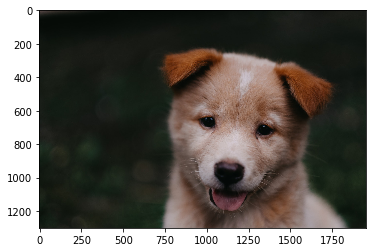

In [7]:
plt.imshow(pic_arr)

In [9]:
pic_red = pic_arr.copy()

In [10]:
pic_arr[:, :, 0]

array([[95, 97, 98, ..., 25, 25, 25],
       [95, 96, 96, ..., 25, 25, 25],
       [95, 94, 94, ..., 25, 25, 25],
       ...,
       [19, 20, 20, ..., 23, 24, 24],
       [20, 20, 19, ..., 23, 24, 24],
       [20, 19, 19, ..., 23, 24, 24]], dtype=uint8)

In [11]:
pic_red[:, :, 1] = 0    # Zero out contribution from green
pic_red[:, :, 2] = 0    # Zero out contribution from blue

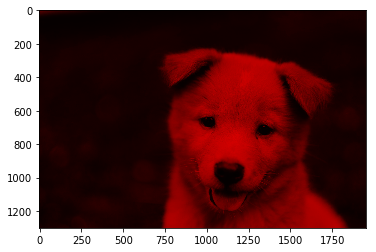

In [12]:
plt.imshow(pic_red)

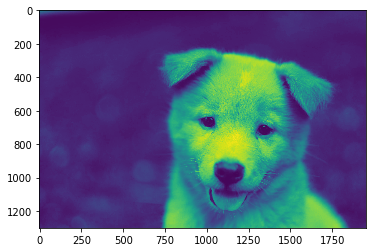

In [13]:
plt.imshow(pic_arr[:, :, 0])

In [14]:
import cv2

In [15]:
img = cv2.imread('DATA/00-puppy.jpg')

In [16]:
img.shape

(1300, 1950, 3)

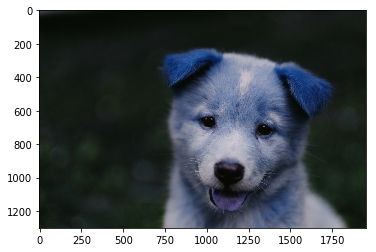

In [17]:
img_bgr = cv2.imread('DATA/00-puppy.jpg')
plt.imshow(img_bgr)

**The image has been correctly loaded by openCV as a numpy array, but the color of each pixel has been sorted as BGR. Matplotlib's plot expects an RGB image so, for a correct display of the image, it is necessary to swap those channels. This operation can be done either by using openCV conversion functions cv2.cvtColor() or by working directly with the numpy array.**

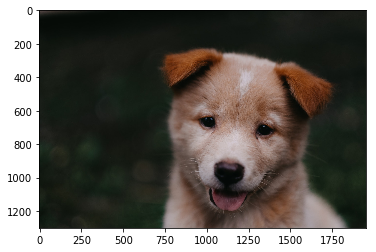

In [18]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

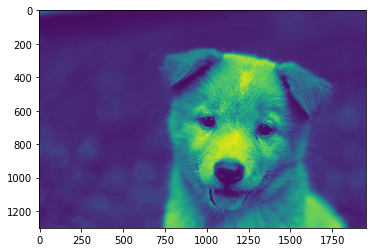

In [19]:
img_gray = cv2.imread('DATA/00-puppy.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray)

In [20]:
img_gray.shape

(1300, 1950)

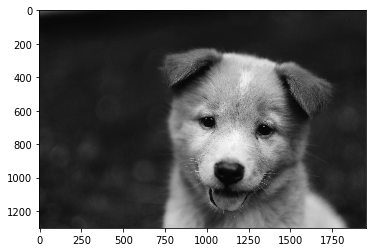

In [21]:
img_gray = cv2.imread('DATA/00-puppy.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray,cmap='gray')

In [22]:
img_gray.shape

(1300, 1950)

In [23]:
## Saving images
cv2.imwrite('my_new_picture.jpg',img_gray)

True

# Object Detection

## Template Matching

In [24]:
full = cv2.imread('DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

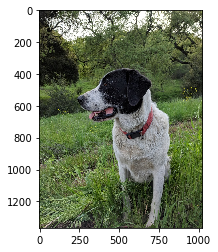

In [25]:
plt.imshow(full)

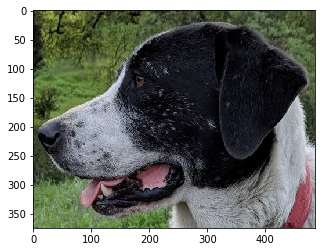

In [26]:
face= cv2.imread('DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [28]:
# The Full Image to Search
full = cv2.imread('DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)


# The Template to Match
face= cv2.imread('DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)


# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 
           'cv2.TM_CCOEFF_NORMED', 
           'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 
           'cv2.TM_SQDIFF', 
           'cv2.TM_SQDIFF_NORMED']

In [29]:
height, width,channels = face.shape

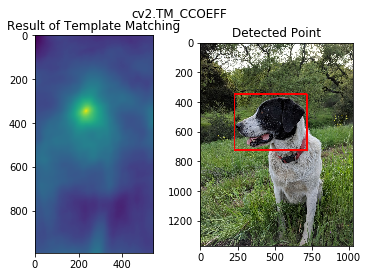

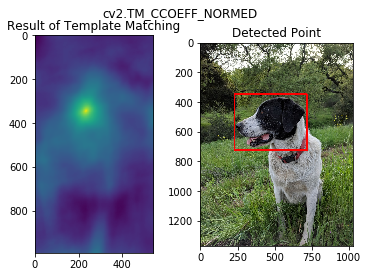

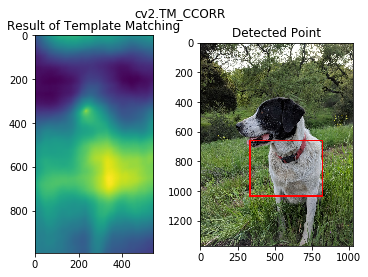

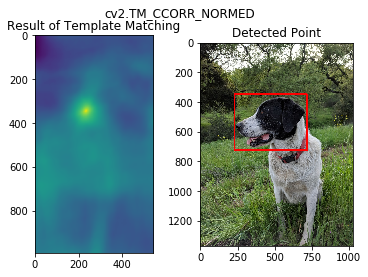

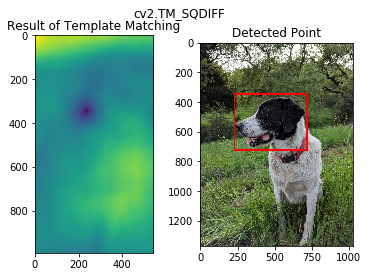

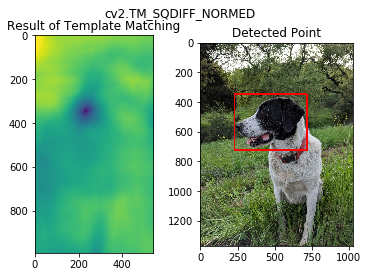

In [30]:
for m in methods:
    
    # Create a copy of the image
    full_copy = full.copy()
    
    # Get the actual function instead of the string
    method = eval(m)

    # Apply template Matching with the method
    res = cv2.matchTemplate(full_copy,face,method)
    
    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Set up drawing of Rectangle
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
        
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(full_copy,top_left, bottom_right, (255,0,0), 10)

    # Plot the Images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')

## Face Detection with Haar Cascades

In [33]:
nadia = cv2.imread('DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread('DATA/solvay_conference.jpg',0)

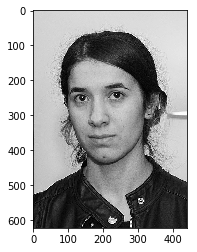

In [35]:
plt.imshow(nadia,cmap='gray')

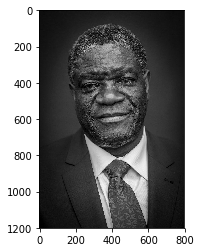

In [36]:
plt.imshow(denis,cmap='gray')

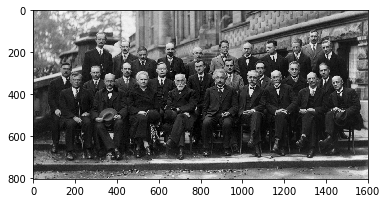

In [37]:
plt.imshow(solvay,cmap='gray')

In [38]:
face_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_frontalface_default.xml')

In [39]:
def detect_face(img):
    
  
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img

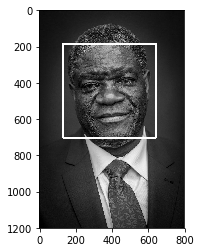

In [40]:
plt.imshow(detect_face(denis),cmap='gray')

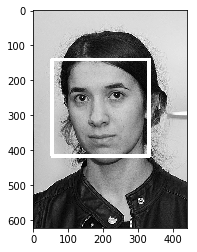

In [41]:
plt.imshow(detect_face(nadia),cmap='gray')

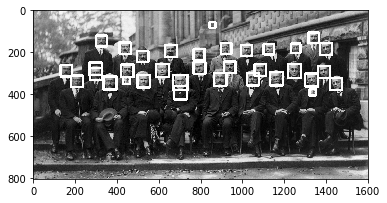

In [42]:
# Gets errors!
plt.imshow(detect_face(solvay),cmap='gray')

In [43]:
def adj_detect_face(img):
    
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img,
                                               scaleFactor=1.2, 
                                               minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img

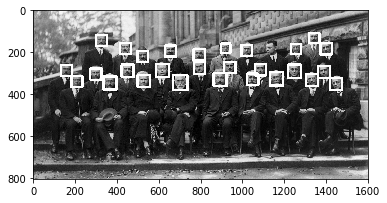

In [44]:
# Doesn't detect the side face.
plt.imshow(adj_detect_face(solvay),cmap='gray')

In [48]:
eye_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_eye.xml')

In [49]:
def detect_eyes(img):
    
    face_img = img.copy()
  
    eyes = eye_cascade.detectMultiScale(face_img) 
    
    
    for (x,y,w,h) in eyes: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img

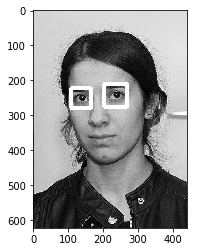

In [50]:
plt.imshow(detect_eyes(nadia),cmap='gray')

## Video Basics

In [53]:
import cv2

# Connects to your computer's default camera
cap = cv2.VideoCapture(0)

# Automatically grab width and height from video feed
# (returns float which we need to convert to integer for later on!)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while True:
    
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    
    # This command let's us quit with the "q" button on a keyboard.
    # Simply pressing X on the window won't work!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture and destroy the windows
cap.release()
cv2.destroyAllWindows()

In [54]:
import cv2

cap = cv2.VideoCapture(0)

# Automatically grab width and height from video feed
# (returns float which we need to convert to integer for later on!)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))


# MACOS AND LINUX: *'XVID' (MacOS users may want to try VIDX as well just in case)
# WINDOWS *'VIDX'
writer = cv2.VideoWriter('DATA/student_capture.mp4', 
                         cv2.VideoWriter_fourcc(*'XVID'),25, 
                         (width, height))


## This loop keeps recording until you hit Q or escape the window
## You may want to instead use some sort of timer, 
## like from time import sleep and then just record for 5 seconds.

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    
    # Write the video
    writer.write(frame)

    # Display the resulting frame
    cv2.imshow('frame',frame)
    
    # This command let's us quit with the "q" button on a keyboard.
    # Simply pressing X on the window won't work!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

        
cap.release()
writer.release()
cv2.destroyAllWindows()

In [56]:
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_eyes(frame)
 
    cv2.imshow('Video Face Detection', frame) 
 
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break 
        
cap.release() 
cv2.destroyAllWindows()